In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from scipy import integrate

In [2]:
N = 100
xstart,xend,ystart,yend = -1.0,1.0,-1.5,1.5
x = numpy.linspace(xstart,xend,N)
y = numpy.linspace(ystart,yend,N)
X,Y = numpy.meshgrid(x,y)

In [3]:
#freestream
u_inf = 1.0

u_free = u_inf*numpy.ones((N,N),dtype=float)
v_free = numpy.zeros((N,N),dtype=float)
psi_free = u_free*Y

In [4]:
class Source:
    """
    Contains information pertaining to a Source or a Sink
    """
    def __init__(self,strength,x,y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the singularity.
        x: float
            x-coordinate of the singularity.
        y: float
            y-coordinate of the singularity.
        """
        self.strength = strength
        self.x,self.y = x,y
    
    def velocity(self,X,Y):
        """
        Computes the velocity field generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = self.strength/(2.0*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2.0*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def PSI(self,X,Y):
        """
        Computes the stream-function generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = self.strength/(2.0*math.pi)*numpy.arctan2((Y-self.y),(X-self.x))

## Finite Number of Sources along a line

In [5]:
#creating source sheet
N_sources = 11
strength = 5
strength_source = strength/N_sources
xsource = numpy.zeros(N_sources,dtype = float)
ysource = numpy.linspace(-1.0,1.0,N_sources)

# creating source line
sources = numpy.empty(N_sources,dtype = object)
for i in range(N_sources):
    sources[i] = Source(strength_source,xsource[i],ysource[i])
    sources[i].velocity(X,Y)
    sources[i].PSI(X,Y)

#superposing values
u,v,psi = u_free.copy(),v_free.copy(),psi_free.copy()
for i in range(N_sources):
    u += sources[i].u
    v += sources[i].v
    psi += sources[i].psi

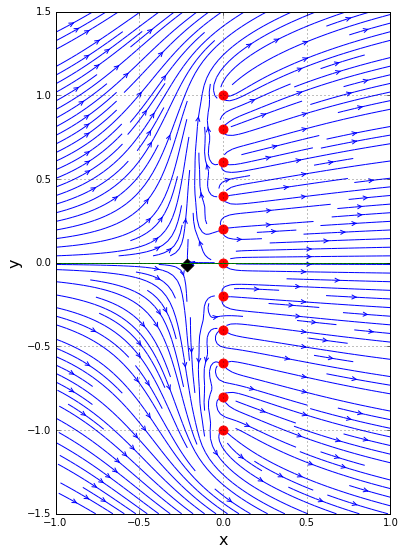

In [6]:
#plotting the streamlines
size = 6
pyplot.figure(figsize = (size,(yend-ystart)/(xend-xstart)*size))
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(xstart,xend)
pyplot.ylim(ystart,yend)
pyplot.grid(1)
pyplot.streamplot(X,Y,u,v,density = 2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
pyplot.scatter(xsource,ysource,color='red',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='g',linewidths=1)
#stagnation points
i_stagn,j_stagn = numpy.unravel_index(numpy.argmin(u**2+v**2),X.shape)
pyplot.scatter(X[i_stagn,j_stagn],Y[i_stagn,j_stagn],s = 80, marker='D',color = 'k')

The dividing streamline ($\psi = 0$) does not change with the strength of the sources. However, as the total strength of the sources increases from 10, the stagnation point appears to be close to the singularities. Therefore, the minimum total strength of the sources to have the stagnation point closer to the singularity.

## Infinite Source Sheet

In [16]:
strength_sheet = 2*u_inf #2.5   #strength of the sheet
y_min,y_max = -1.0,1.0          #boundaries of the sheet

#creating dummy integration function to vectorize
def integration(x,y,integrand):
    return integrate.quad(integrand,y_min,y_max,args=(x,y))[0]
#vectorizing function
vec_integration = numpy.vectorize(integration)

integrand_u = lambda s,x,y: x/(x**2+(y-s)**2)
integrand_v = lambda s,x,y: (y-s)/(x**2+(y-s)**2)
integrand_psi = lambda s,x,y: numpy.arctan2(y-s,x)

u_sheet = strength_sheet/(2.0*math.pi)*vec_integration(X,Y,integrand_u)
v_sheet = strength_sheet/(2.0*math.pi)*vec_integration(X,Y,integrand_v)
psi_sheet = strength_sheet/(2.0*math.pi)*vec_integration(X,Y,integrand_psi)
#superposition of freestream
U = u_sheet + u_free
V = v_sheet + v_free
Psi = psi_sheet + psi_free

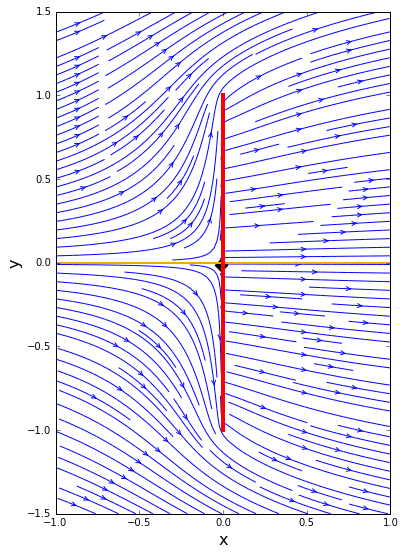

In [23]:
size=6
pyplot.figure(figsize = (size,(yend-ystart)/(xend-xstart)*size))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(xstart,xend)
pyplot.ylim(ystart,yend)
pyplot.grid(0)
pyplot.streamplot(X,Y,U,V,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.contour(X,Y,Psi,levels=[0.],colors='orange',linewidths=2)
pyplot.axvline(0.,(y_min-ystart)/(yend-ystart),(y_max-ystart)/(yend-ystart),color = 'red',linewidth=4)
#stagnation points
i_stag,j_stag = numpy.unravel_index(numpy.argmin((U**2+V**2)**0.5),U.shape)
pyplot.scatter(X[i_stag,j_stag],Y[i_stag,j_stag],marker='D',color='k',s=80)

The tangency condition required for a source sheet is $\frac{\sigma}{2} = U_\infty$.

In [10]:
print("Using the new value of strength of the sheet, the stagnation point is at (",X[i_stag,j_stag],",",Y[i_stag,j_stag],")")

Using the new value of strength of the sheet, the stagnation point is at ( -0.010101010101 , -0.0151515151515 )


The dividing streamline is shown in the figure above as the orange line. It is a horizontal line with x=0.